## Dataset

In [1]:
from sklearn.datasets import load_wine
x,y = load_wine(return_X_y=True)
print(x.shape," ",y.shape)

(178, 13)   (178,)


In [2]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size = .2,random_state=12)

## Upsample in Auto Mode

In [3]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_res_auto, y_res_auto = sm.fit_resample(x_train, y_train)

## Upsample with number of examples for each class mentioned

In [4]:
from imblearn.over_sampling import SMOTE
import numpy as np

sm = SMOTE(random_state=42,ratio = {i:13000 for i in range(len(np.unique(y)))})
x_res_men, y_res_men = sm.fit_resample(x_train, y_train)

/home/rahulsuresh/python-environments/env/lib/python3.5/site-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (13000) in class 0 will be larger than the number of samples in the majority class (class #1 -> 60)
  n_samples_majority))
/home/rahulsuresh/python-environments/env/lib/python3.5/site-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (13000) in class 1 will be larger than the number of samples in the majority class (class #1 -> 60)
  n_samples_majority))
/home/rahulsuresh/python-environments/env/lib/python3.5/site-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (13000) in class 2 will be larger than the number of samples in the majority class (class #1 -> 60)
  n_samples_majority))


## Before Upsampling

In [5]:
from collections import Counter
Counter(y_train)

Counter({0: 45, 1: 60, 2: 37})

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x_train)

print(pca_result.shape)

x1 = pca_result[:,0]
x2 = pca_result[:,1]

(142, 2)


In [7]:
from random import randint
def get_colors(N):
    colors=[]
    for i in range(0,N):
        colors.append('#{:06x}'.format(randint(0, 256**3)))
    return colors

In [8]:
def get_handles(colors):
    handles=[]
    for i in range(len(colors)):
        handles.append(mpatches.Patch(color=colors[i], label='Class'+str(i)))
    return handles

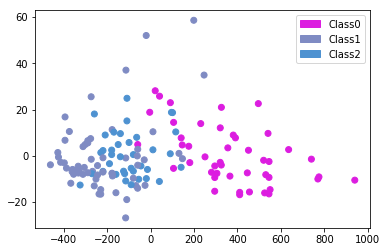

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import matplotlib

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

colors = get_colors(len(np.unique(y_train)))

ax.scatter(x1,x2,c=y_train,cmap=matplotlib.colors.ListedColormap(colors))

plt.legend(handles=get_handles(colors))

plt.show()

## After Upsampling

In [12]:
from collections import Counter
Counter(y_res_auto)

Counter({0: 60, 1: 60, 2: 60})

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x_res_auto)

print(pca_result.shape)

x1 = pca_result[:,0]
x2 = pca_result[:,1]

(180, 2)


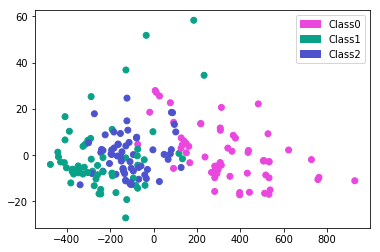

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import matplotlib

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

colors = get_colors(len(np.unique(y_res_auto)))

ax.scatter(x1,x2,c=y_res_auto,cmap=matplotlib.colors.ListedColormap(colors))

plt.legend(handles=get_handles(colors))

plt.show()